In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv('../hotel_booking.csv')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [155]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Stage 2 Data Preprocessing

[Stage 2] Final Project DS 23

Periode : 15 - 21 Agustus

Halo teman-teman! Setelah menemukan insight, dan visualiasi dari dataset yang dipilih, kini saatnya teman-teman masuk ke dalam proses Data Pre-Processing untuk menentukan :
1. Apakah sudah melakukan pengecekkan data bermasalah seperti missing values, invalid values, atau data duplicate dan sudah membersihkannya?
2. Apakah sudah menentukan feature apa saja yang akan digunakan, atau perlu ditambahkan, dan reformatting feature sesuai dengan kebutuhan?

Penting! Saat memanipulasi data, mohon dilakukan dengan alasan yang jelas, dan tidak melakukan penambahan feature baru tapi tidak ada alasan yang mendasari langkah tersebut diperlukan.

Silahkan selesaikan dan kumpulkan dokumen Stage 2 tersebut (Notulen Mentoring, Source Code, Laporan Project) ke link gdrive yang sudah disiapkan (akan diinfokan secara personal ke masing-masing tim), paling lambat tanggal 21 Agustus 2022 pukul 23:59

## Buat Dataset untuk hasil Preprocessing

In [156]:
df_clean = df.copy()
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Cek data duplicate

Mengecek apakah terdapat data yang duplikat dilihat dari kolom `name`, `email`, `arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month` 

In [157]:
df.duplicated(subset=['name', 'email', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']).sum()

0

## Hotel

Perlu dilakukan OHE pada kolom Hotel dengan merubah setiap nilai kolom menjadi kolom baru dengan nilai biner yaitu 0 atau 1. Penggunaan OHE ini karena kolom Hotel tidak memiliki urutan/tingkatan. Dimana Resort hotel dilambangkan 1 dan City hotel dilambangkan 0.

In [158]:
# OHE
hotel_ohe = pd.get_dummies(df.hotel,drop_first=True)
# Gabungkan hasil OHE ke dataset
df_clean = df_clean.join(hotel_ohe)
# Hapus kolom `hotel`
df_clean = df_clean.drop('hotel', axis=1)


df_clean.head(1)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,1


## Arrival Date

### arrival_date_year, arrival_date_month, dan arrival_date_day_of_month

Membuat kolom `date` yang merupakan gabungan dari kolom `arrival_date_year`, `arrival_date_month`, dan `arrival_date_day_of_month`

Membuat kolom `is_weekend` untuk mendapatkan informasi mengenai tanggal arrival apakah di weekend atau weekdays

In [159]:
def month(x):
    if x['arrival_date_month'] == 'January':
            month = '1'
    elif x['arrival_date_month'] == 'February':
            month = '2'
    elif x['arrival_date_month'] == 'March':
            month = '3' 
    elif x['arrival_date_month'] =='April':
            month = '4'
    elif x['arrival_date_month'] == 'May':
            month = '5'    
    elif x['arrival_date_month'] == 'June':
            month = '6'
    elif x['arrival_date_month'] == 'July':
            month = '7'
    elif x['arrival_date_month'] == 'August':
            month = '8'
    elif x['arrival_date_month'] == 'September':
            month = '9'
    elif x['arrival_date_month'] == 'October':
            month = '10'
    elif x['arrival_date_month'] == 'November':
            month = '11'
    else:
            month = '12'
    return month

In [160]:
df_clean['month_number'] = df_clean.apply(lambda x: month(x), axis=1)
# merubah tahun dan hari menjadi string
df_clean["arrival_date_day_of_month"] = df_clean["arrival_date_day_of_month"].astype(str)
df_clean["arrival_date_year"] = df_clean["arrival_date_year"].astype(str)
# membuat kolom date of arrival
df_clean["date"] = pd.to_datetime(df_clean["arrival_date_year"] + "/" + df_clean["month_number"] + "/" + df_clean["arrival_date_day_of_month"])  

# menambahkan info tanggal weekend
df_clean["isWeekend"] = df_clean["date"].dt.weekday >= 5
def weekend(x):
    if x['isWeekend'] ==True:
            weekend = 1
    else: 
            weekend = 0
    return weekend
df_clean['is_weekend'] = df_clean.apply(lambda x: weekend(x), axis=1)


### Membuat kolom musim berdasarkan bulan pemesanan

In [161]:
def pembagian_musim(value):
    value = int(value)
    if value in [3, 4, 5]:
        return 'spring'
    elif value in [6, 7, 8]:
        return 'summer'
    elif value in [9, 10, 11]:
        return 'autumn'
    elif value in [2, 1, 12]:
        return 'winter'

In [162]:
df_clean['season'] = df_clean['month_number'].apply(pembagian_musim)

In [163]:
df_clean['season']

0         summer
1         summer
2         summer
3         summer
4         summer
           ...  
119385    summer
119386    summer
119387    summer
119388    summer
119389    summer
Name: season, Length: 119390, dtype: object

Membuat OHE untuk pembagian musim

In [164]:
season_ohe = pd.get_dummies(df_clean.season,drop_first=True, prefix='season')
df_clean = df_clean.join(season_ohe)

In [165]:
# Menghapus kolom yang tidak terpakai
df_clean = df_clean.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'isWeekend','date','month_number','season'], axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,reservation_status_date,name,email,phone-number,credit_card,Resort Hotel,is_weekend,season_spring,season_summer,season_winter
0,0,342,27,0,0,2,0.0,0,BB,PRT,...,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,1,0,0,1,0


### arrival_date_week_number

Kolom `arrival_date_week_number` tidak diubah

In [166]:
# df_clean = df_clean.drop('arrival_date_week_number', axis=1)

## Stays

Akan dibuat kolom total_stay dari gabungan kolom stays_in_weekend_nights dan stays_in_week_nights

In [167]:
df_clean['total_stay'] = df_clean.apply(lambda x: (x['stays_in_weekend_nights']) + (x['stays_in_week_nights']), axis=1)
#hapus kolom stays_weekend dan weeknight
df_clean = df_clean.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1)

## Adults, children, dan babies

### Adults

In [168]:
df.adults.describe()

count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

Kolom adults memiliki nilai minimal 0, ini sebuah kesalahan dimana booking harus ada orang dewasa

In [169]:
df[df['adults']<1].shape

(403, 36)

Ada 403 baris yang memiliki nilai < 1

Drop baris dengan nilai dibawah 1

In [170]:
df_clean = df_clean[df_clean['adults']>0]
df_clean.shape

(118987, 36)

### Children, babies

Dilakukan penjumlahan antara kolom children dan babies menjadi kolom Kids, karena diasumsikan children dan babies masuk ke dalam kategori yang sama, yaitu kids. 

In [171]:
#Kolom children yang nilainya kosong diganti dengan 0.
df_clean.children = df_clean.children.fillna(0)

#Kolom kids (children dan babies)
df_clean['kids'] = df_clean.apply(lambda x: (x['children']) + (x['babies']), axis=1)

# Mengubah tipe data menjadi int
df_clean.kids = df_clean.kids.astype(int)

### Buat kolom baru Total guest dan is_have_kids

Buat kolom baru :
- `total_guest` : gabungan dari kolom `adults` dan `kids`
- `is_have_kids` : status apakah memiliki anak-anak atau tidak

In [172]:
df_clean['total_guest'] = df_clean['adults'] + df_clean['kids']

df_clean['is_have_kids']  = df_clean['kids'].apply(lambda x : 0 if x<1 else 1)

In [173]:
# Menghapus kolom yang tidak diperlukan
df_clean = df_clean.drop(['adults', 'children', 'babies', 'kids'], axis=1)

In [174]:
df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,phone-number,credit_card,Resort Hotel,is_weekend,season_spring,season_summer,season_winter,total_stay,total_guest,is_have_kids
0,0,342,27,BB,PRT,Direct,Direct,0,0,0,...,669-792-1661,************4322,1,0,0,1,0,0,2,0


## Meal

Perlu dilakukan OHE pada kolom meal dengan merubah setiap nilai kolom menjadi kolom baru dengan nilai biner yaitu 0 atau 1. Penggunaan OHE ini karena kolom meal tidak memiliki urutan/tingkatan.

Value :
- BB : bed and breakfast
- HB : half board (breakfast and dinner included)
- FB : full board (breakfast, lunch, and dinner included)
- SC : self catering (no meals included)
- Undefined

In [175]:
df_clean.meal.value_counts()

BB           92020
HB           14454
SC           10546
Undefined     1169
FB             798
Name: meal, dtype: int64

Ubah value Undefined ke SC (no meals)

In [176]:
df_clean['meal'] = df_clean['meal'].apply(lambda x: 'SC' if x=='Undefined' else x)

In [177]:
df_clean.meal.value_counts()

BB    92020
HB    14454
SC    11715
FB      798
Name: meal, dtype: int64

In [178]:
meal_ohe = pd.get_dummies(df_clean.meal,drop_first=True, prefix='meal')
df_clean = df_clean.join(meal_ohe)

In [179]:
df_clean = df_clean.drop('meal', axis=1)

## Country

Dikarenakan terdapat banyak data country yang memungkinkan apabila digunakan untuk analisis, jumlah data negara PRT (Portugal) ... maka dikelompokkan data country menjadi 2 yaitu Portugal dan Non Portugal. Dimana Portugal diberi label 1 dan Non Portugal diberi label 0.

In [180]:
df_clean['country'].isnull().sum()

478

Mengubah nilai kosong pada kolom Country menjadi PRT

In [181]:
df_clean['country'] = df_clean['country'].fillna('PRT')

In [182]:
df_clean['country'].isnull().sum()

0

In [183]:
#Kolom country
df_clean['negara'] = df_clean.apply(lambda x: "Portugal" if (x['country'] == 'PRT') else "Others", axis=1)

In [184]:
df_clean.negara.value_counts()

Others      70069
Portugal    48918
Name: negara, dtype: int64

In [185]:
mapping_negara = {
    'Portugal' : 1,
    'Others' : 0,
}

Buat kolom `is_lokal` yang merupakan status apabila berasal dari lokal (portugal) atau tidak

In [186]:
df_clean['is_lokal'] = df_clean['negara'].map(mapping_negara)


In [187]:
# Hapus kolom Country
df_clean = df_clean.drop(['country', 'negara'], axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,...,season_spring,season_summer,season_winter,total_stay,total_guest,is_have_kids,meal_FB,meal_HB,meal_SC,is_lokal
0,0,342,27,Direct,Direct,0,0,0,C,C,...,0,1,0,0,2,0,0,0,0,1


## Market_Segment

Kolom Market_Segment akan di drop karena redundant dengan kolom Distribution_Channel

In [188]:
df_clean = df_clean.drop('market_segment',axis=1)

## Distribution Channel

Value :
- Corporate
- Direct
- GDS
- TA/TO
- Undefined

In [189]:
df_clean.distribution_channel.value_counts()

TA/TO        97560
Direct       14578
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

Baris yang berisi GDS dan Undefined akan diubah menjadi Any karena jumlahnya sedikit

In [190]:
df_clean['distribution_channel'] = df_clean['distribution_channel'].apply(lambda x: 'Any' if x in ['GDS', 'Undefined'] else x)


Dilakukan feature encoding menggunakan One Hot Encoding untuk setiap value

In [191]:
dist_ohe = pd.get_dummies(df_clean.distribution_channel, drop_first=True, prefix='distribution')
df_clean = df_clean.join(dist_ohe)


In [192]:
df_clean = df_clean.drop('distribution_channel',axis=1)
df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,...,total_stay,total_guest,is_have_kids,meal_FB,meal_HB,meal_SC,is_lokal,distribution_Corporate,distribution_Direct,distribution_TA/TO
0,0,342,27,0,0,0,C,C,3,No Deposit,...,0,2,0,0,0,0,1,0,1,0


## Is_repeated_guest

Kolom `is_repeated_guest` tidak diubah

In [193]:
df.is_repeated_guest.value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

## previous_cancellations

In [194]:
df.previous_cancellations.value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

Akan diubah valuenya:
- 0 > tidak pernah cancel
- 1 > pernah cancel 1x atau lebih

In [195]:
df_clean['previous_cancellations'] = df_clean['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)
df_clean['previous_cancellations'].value_counts()

0    112510
1      6477
Name: previous_cancellations, dtype: int64

## previous_bookings_not_canceled

Akan dihapus karena redundant dengan `previous_cancellations`

In [196]:
df.previous_bookings_not_canceled.value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [197]:
df_clean = df_clean.drop('previous_bookings_not_canceled', axis=1)

## Reserved_room_type dan assigned_room_type

Buat kolom `room_as_ordered` dari perbandingan kolom `reserved_room_type` dan `assigned_room_type`

In [198]:
df_clean['room_as_ordered'] = np.where(df_clean['reserved_room_type'] == df_clean['assigned_room_type'], 1, 0)

# Hapus kolom tidak terpakai
df_clean = df_clean.drop(['reserved_room_type', 'assigned_room_type'], axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,agent,company,days_in_waiting_list,...,total_guest,is_have_kids,meal_FB,meal_HB,meal_SC,is_lokal,distribution_Corporate,distribution_Direct,distribution_TA/TO,room_as_ordered
0,0,342,27,0,0,3,No Deposit,NaN,NaN,0,...,2,0,0,0,0,1,0,1,0,1


## booking_changes

- Kolom booking_changes memiliki value numerical, akan tetapi untuk memudahkan maka diubah medengan menggunakan conditions dengan asumsi:
- Jika booking tidak ada perubahan makan = 0 maka dikategorikan sebagai 0, sedangkan jika customer perubahan booking >= 1 maka dikategorikan sebagai 1.

In [199]:
df['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [200]:
df_clean['booking_changes'] = [0 if x == 0 else 1 for x in df_clean['booking_changes']]

## Deposit Type

Perlu dilakukan OHE pada kolom deposit_type dengan merubah setiap nilai kolom menjadi kolom baru dengan nilai biner yaitu 0 atau 1. Penggunaan OHE ini karena deposit_type dan tidak memiliki urutan/tingkatan.

In [201]:
deposit_ohe = pd.get_dummies(df_clean['deposit_type'], prefix='deposit_type',drop_first=True)
df_clean = df_clean.join(deposit_ohe)

# Hapus kolom tidak terpakai
df_clean = df_clean.drop('deposit_type', axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,agent,company,days_in_waiting_list,customer_type,...,meal_FB,meal_HB,meal_SC,is_lokal,distribution_Corporate,distribution_Direct,distribution_TA/TO,room_as_ordered,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,27,0,0,1,NaN,NaN,0,Transient,...,0,0,0,1,0,1,0,1,0,0


## Agent dan Company

Berisi id dari agent travel dan company

In [202]:
df_clean[['agent', 'company']]

,agent,company
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,304.0,NaN
4,240.0,NaN
...,...,...
119385,394.0,NaN
119386,9.0,NaN
119387,9.0,NaN
119388,89.0,NaN


In [203]:
df_clean[['agent', 'company']].isnull().sum()

agent       16263
company    112221
dtype: int64

Banyak nilai kosong pada kedua kolom

Karena berisi id, nilai kosong akan diubah menjadi 0

In [204]:
df_clean[['agent', 'company']] = df_clean[['agent', 'company']].fillna(0)

In [205]:
df_clean[['agent', 'company']].isnull().sum()

agent      0
company    0
dtype: int64

In [206]:
df_clean['agent'].value_counts()
df_clean['company'].value_counts()

0.0      112221
40.0        924
223.0       784
67.0        267
45.0        247
          ...  
142.0         1
32.0          1
11.0          1
487.0         1
376.0         1
Name: company, Length: 349, dtype: int64

Karena nilainya sangat beragam, kedua kolom akan dihapus

In [207]:
df_clean = df_clean.drop(['agent', 'company'], axis=1)

## Customer Type

Perlu dilakukan OHE pada kolom customer_type dengan merubah setiap nilai kolom menjadi kolom baru dengan nilai biner yaitu 0 atau 1. Penggunaan OHE ini karena customer_type tidak memiliki urutan/tingkatan.

In [208]:
customer_ohe = pd.get_dummies(df_clean['customer_type'], prefix='customer_type',drop_first=True)
df_clean = df_clean.join(customer_ohe)

# Hapus kolom tidak terpakai
df_clean = df_clean.drop('customer_type', axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,...,is_lokal,distribution_Corporate,distribution_Direct,distribution_TA/TO,room_as_ordered,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,0,0,1,0,0.0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [209]:
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Handle ADR Outlier dengan metode IQR

## Total_of_special_requests, required_car_parking_spaces, dan days_in_waiting_list

- Kolom total_of_special_requests, required_car_parking_spaces, dan days_in_waiting_list sudah memiliki value numerical, akan tetapi untuk memudahkan maka diubah medengan menggunakan conditions dengan asumsi:
- Jika customer memiliki permintaan khusus total_of_special_requests = 0 maka dikategorikan sebagai 0, sedangkan jika customer memiliki permintaan khusus >= 1 maka dikategorikan sebagai 1. Hal ini berlaku juga untuk kolom required_car_parking_spaces dan days_in_waiting_list.

In [210]:
df_clean['new_total_special_request'] = [0 if x == 0 else 1 for x in df_clean['total_of_special_requests']]

df_clean['new_required_car_parking_spaces'] = [0 if x == 0 else 1 for x in df_clean['required_car_parking_spaces']]

df_clean['new_days_in_waiting_list'] = [0 if x == 0 else 1 for x in df_clean['days_in_waiting_list']]


In [211]:
df['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [212]:
# Hapus kolom tidak terpakai
df_clean = df_clean.drop(['total_of_special_requests', 'required_car_parking_spaces', 'days_in_waiting_list'], axis=1)

df_clean.head(3)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,adr,reservation_status,reservation_status_date,name,...,distribution_TA/TO,room_as_ordered,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,new_total_special_request,new_required_car_parking_spaces,new_days_in_waiting_list
0,0,342,27,0,0,1,0.0,Check-Out,2015-07-01,Ernest Barnes,...,0,1,0,0,0,1,0,0,0,0
1,0,737,27,0,0,1,0.0,Check-Out,2015-07-01,Andrea Baker,...,0,1,0,0,0,1,0,0,0,0
2,0,7,27,0,0,0,75.0,Check-Out,2015-07-02,Rebecca Parker,...,0,0,0,0,0,1,0,0,0,0


## Reservation_status

Redundant dengan kolom `is_canceled`, akan dihapus

In [213]:
df_clean = df_clean.drop('reservation_status', axis=1)

## Reservation_status_date

Kolom akan di hapus

In [214]:
df_clean = df_clean.drop('reservation_status_date', axis=1)

## Name, email, phone-number, credit_card

Kolom akan dihapus karena nilai masing-masing kolom sangat unik

In [215]:
df_clean = df_clean.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

In [216]:
df_clean2 = df_clean.copy()

## Lead Time

In [217]:
# Batas atas dan bawah lead_time
lead_time_Q1 = df['lead_time'].quantile(0.25)
lead_time_Q3 = df['lead_time'].quantile(0.75)
lead_time_IQR = lead_time_Q3 - lead_time_Q1
lead_time_low_limit = lead_time_Q1 - (lead_time_IQR * 1.5)
lead_time_high_limit = lead_time_Q3 + (lead_time_IQR * 1.5)

print(lead_time_IQR)
print(lead_time_low_limit)
print(lead_time_high_limit)

142.0
-195.0
373.0


In [218]:
# Mengeluarkan lead_time outlier dan data 0 dan minus
df_clean = df_clean[ (df_clean['lead_time']>=0) & (df_clean['lead_time']<=373)]

## ADR

In [219]:
# Batas atas dan bawah lead_time
adr_Q1 = df['adr'].quantile(0.25)
adr_Q3 = df['adr'].quantile(0.75)
adr_IQR = adr_Q3 - adr_Q1
adr_low_limit = adr_Q1 - (adr_IQR * 1.5)
adr_high_limit = adr_Q3 + (adr_IQR * 1.5)

print(adr_IQR)
print(adr_low_limit)
print(adr_high_limit)

56.709999999999994
-15.774999999999991
211.065


In [220]:
# Mengeluarkan ADR outlier dan data 0 dan minus
df_clean = df_clean[ (df_clean['adr']>0) & (df_clean['adr']<=211)]

## Dataset akhir setelah Preprocessing

In [221]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110404 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   is_canceled                      110404 non-null  int64  
 1   lead_time                        110404 non-null  int64  
 2   arrival_date_week_number         110404 non-null  int64  
 3   is_repeated_guest                110404 non-null  int64  
 4   previous_cancellations           110404 non-null  int64  
 5   booking_changes                  110404 non-null  int64  
 6   adr                              110404 non-null  float64
 7   Resort Hotel                     110404 non-null  uint8  
 8   is_weekend                       110404 non-null  int64  
 9   season_spring                    110404 non-null  uint8  
 10  season_summer                    110404 non-null  uint8  
 11  season_winter                    110404 non-null  uint8  
 12  to

In [222]:
df_clean.head()

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,adr,Resort Hotel,is_weekend,season_spring,...,distribution_TA/TO,room_as_ordered,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,new_total_special_request,new_required_car_parking_spaces,new_days_in_waiting_list
2,0,7,27,0,0,0,75.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,13,27,0,0,0,75.0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,14,27,0,0,0,98.0,1,0,0,...,1,1,0,0,0,1,0,1,0,0
5,0,14,27,0,0,0,98.0,1,0,0,...,1,1,0,0,0,1,0,1,0,0
6,0,0,27,0,0,0,107.0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [223]:
df_clean.isnull().sum()

is_canceled                        0
lead_time                          0
arrival_date_week_number           0
is_repeated_guest                  0
previous_cancellations             0
booking_changes                    0
adr                                0
Resort Hotel                       0
is_weekend                         0
season_spring                      0
season_summer                      0
season_winter                      0
total_stay                         0
total_guest                        0
is_have_kids                       0
meal_FB                            0
meal_HB                            0
meal_SC                            0
is_lokal                           0
distribution_Corporate             0
distribution_Direct                0
distribution_TA/TO                 0
room_as_ordered                    0
deposit_type_Non Refund            0
deposit_type_Refundable            0
customer_type_Group                0
customer_type_Transient            0
c

<AxesSubplot:>

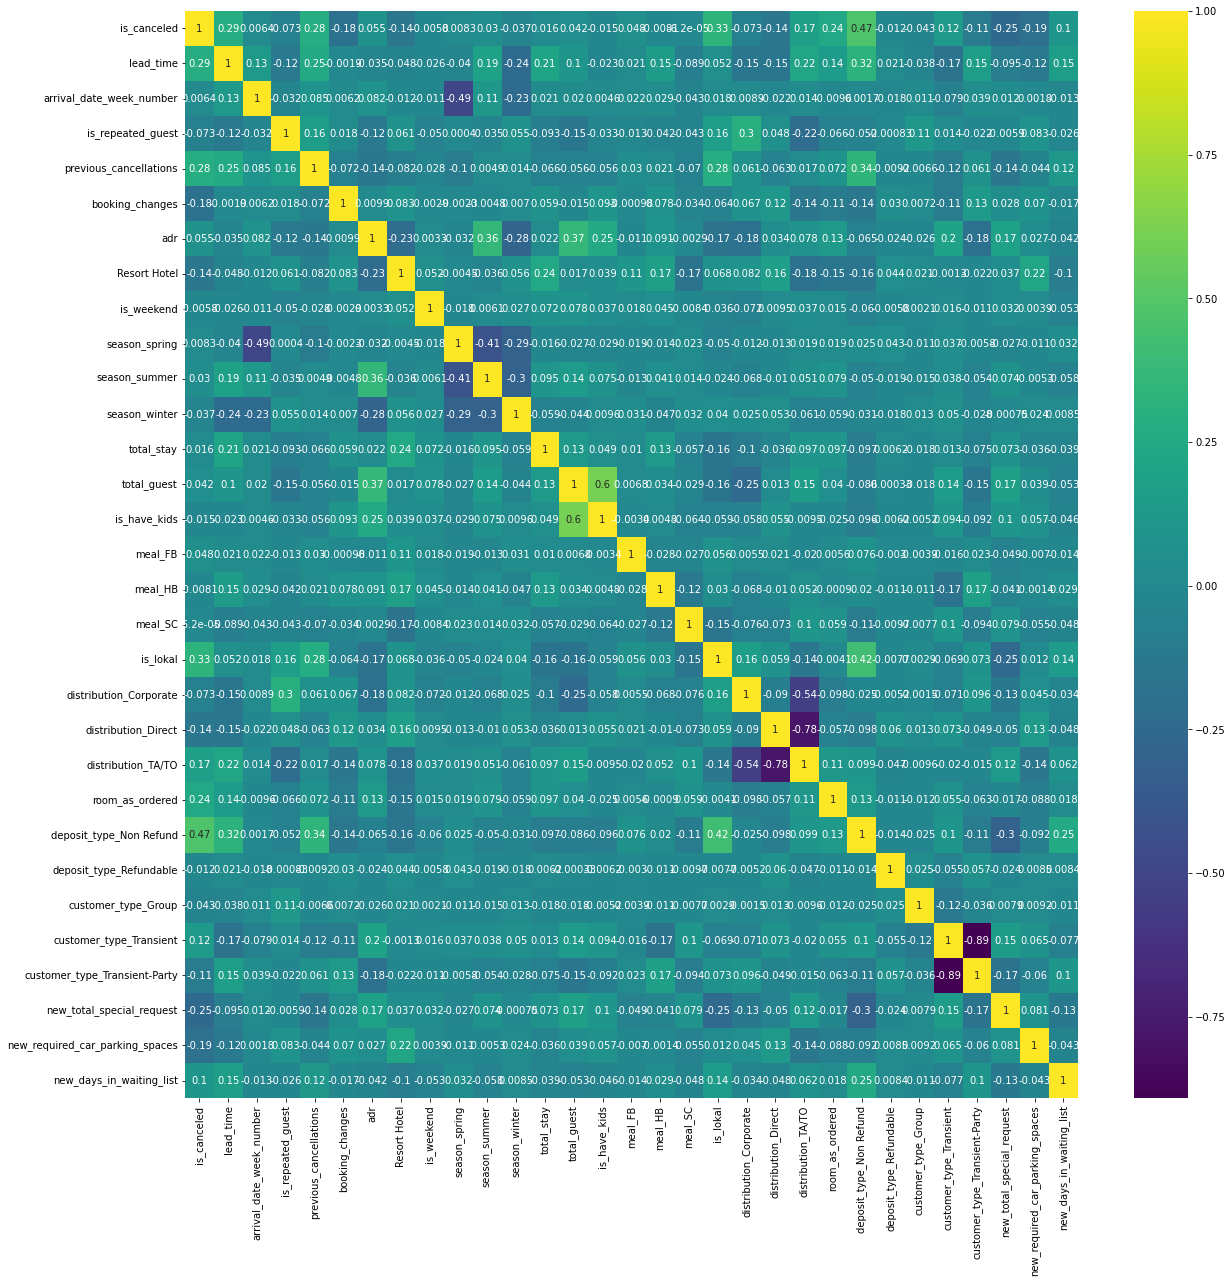

In [224]:
plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(),annot=True,cmap='viridis')

## Dataset v1 untuk proses standarisasi df_clean1

In [225]:
from sklearn.preprocessing import StandardScaler
df_clean1 = df_clean.copy()

In [226]:
scaler = StandardScaler()
df_clean1['adr'] = scaler.fit_transform(df_clean['adr'].values.reshape(len(df_clean),1))

In [227]:
df_clean1['lead_time'] = scaler.fit_transform(df_clean['lead_time'].values.reshape(len(df_clean),1))

In [228]:
df_clean1['adr'].describe()

count    1.104040e+05
mean     4.867152e-14
std      1.000005e+00
min     -2.533463e+00
25%     -7.415248e-01
50%     -1.223801e-01
75%      6.195702e-01
max      2.858213e+00
Name: adr, dtype: float64

In [229]:
df_clean1['lead_time'].describe()

count    1.104040e+05
mean    -8.495748e-15
std      1.000005e+00
min     -1.042241e+00
25%     -8.488125e-01
50%     -3.115125e-01
75%      6.233895e-01
max      2.966017e+00
Name: lead_time, dtype: float64

## Dataset v2 untuk proses pengelompokan kolom ADR dan lead_time df_clean2

In [230]:
df_clean2['adr'].describe()

count    118987.000000
mean        102.008076
std          50.448822
min          -6.380000
25%          69.500000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [231]:
def adr_cluster(value):
    
    if value <= 69:
        return 1
    elif value >69 and value <= 94.5:
        return 2
    elif value > 94.5 and value <=126:
        return 3
    elif value > 126:
        return 4

In [232]:
df_clean2['adr_group'] = df_clean2['adr'].apply(adr_cluster)

In [233]:
df_clean2['adr_group'].value_counts()

3    30443
2    29775
1    29603
4    29166
Name: adr_group, dtype: int64

In [234]:
df_clean2['lead_time'].describe()

count    118987.000000
mean        104.070537
std         106.890775
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [235]:
def lead_time_cluster(value):
    
    if value <= 18:
        return 1
    elif value >18 and value <= 69:
        return 2
    elif value > 69 and value <=160:
        return 3
    elif value > 160:
        return 4

In [236]:
df_clean2['lead_time_group'] = df_clean2['lead_time'].apply(lead_time_cluster)

In [237]:
df_clean2['lead_time_group'].value_counts()

1    30101
4    29728
3    29589
2    29569
Name: lead_time_group, dtype: int64

Hapus lead_time dan ADR

In [238]:
df_clean2 = df_clean2.drop(['adr','lead_time'], axis=1)

In [239]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118987 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   is_canceled                      118987 non-null  int64
 1   arrival_date_week_number         118987 non-null  int64
 2   is_repeated_guest                118987 non-null  int64
 3   previous_cancellations           118987 non-null  int64
 4   booking_changes                  118987 non-null  int64
 5   Resort Hotel                     118987 non-null  uint8
 6   is_weekend                       118987 non-null  int64
 7   season_spring                    118987 non-null  uint8
 8   season_summer                    118987 non-null  uint8
 9   season_winter                    118987 non-null  uint8
 10  total_stay                       118987 non-null  int64
 11  total_guest                      118987 non-null  int64
 12  is_have_kids                  

# Stage 3 Modeling

In [240]:
# library untuk split data
from sklearn.model_selection import train_test_split

# library untuk evaluasi
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Library untuk tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Data 1

In [241]:
X1 = df_clean.drop('is_canceled', axis=1)
y1 = df_clean['is_canceled']

### Split train test

In [242]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 3)

### Modeling

#### Logistic Regression

In [243]:
from sklearn.linear_model import LogisticRegression

ls1 = LogisticRegression()

Prediction result

Tuning

Result after tuning

#### Decision Tree

In [244]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()

Prediction result

Tuning

Result after tuning

#### Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=42)

rf1.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

Prediction result

In [246]:
rf1_pred = rf1.predict(X1_test)
rf1_pred_proba = rf1.predict_proba(X1_test)

In [247]:
print(classification_report(y1_test, rf1_pred))
print(roc_auc_score(y1_test, rf1_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     21117
           1       0.85      0.79      0.82     12005

    accuracy                           0.88     33122
   macro avg       0.87      0.86      0.86     33122
weighted avg       0.87      0.88      0.87     33122

0.9435345058057666


In [248]:
pd.Series(xg1.feature_importances_, index=X1.columns)

lead_time                          0.006070
arrival_date_week_number           0.003127
is_repeated_guest                  0.008226
previous_cancellations             0.053216
booking_changes                    0.010674
adr                                0.004438
Resort Hotel                       0.006582
is_weekend                         0.002022
season_spring                      0.001710
season_summer                      0.004067
season_winter                      0.008023
total_stay                         0.002822
total_guest                        0.003421
is_have_kids                       0.003178
meal_FB                            0.003204
meal_HB                            0.005019
meal_SC                            0.008971
is_lokal                           0.017944
distribution_Corporate             0.007690
distribution_Direct                0.003462
distribution_TA/TO                 0.013589
room_as_ordered                    0.053735
deposit_type_Non Refund         

Text(0.5, 1.0, 'feature importance score')

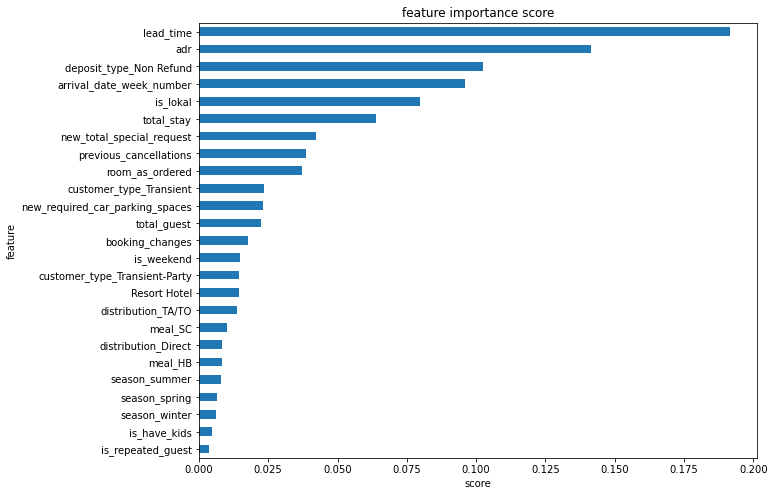

In [249]:
rf1_feat = pd.Series(rf1.feature_importances_, index=X1.columns)
ax = rf1_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Tuning

In [250]:
#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf1_new = RandomForestClassifier(random_state=42)
rf1_tuned = RandomizedSearchCV(rf1_new, hyperparameters, cv=5, random_state=42, scoring='recall')
rf1_tuned.fit(X1_train,y1_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                       

Result after tuning

In [251]:
for key, value in hyperparameters.items() :
        print('Best '+key+':', rf1_tuned.best_estimator_.get_params()[key])

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [252]:
rf1_tuned_pred = rf1_tuned.predict(X1_test)
rf1_tuned_pred_proba = rf1_tuned.predict_proba(X1_test)

print(classification_report(y1_test, rf1_tuned_pred))
print(roc_auc_score(y1_test, rf1_tuned_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     21117
           1       0.86      0.78      0.82     12005

    accuracy                           0.88     33122
   macro avg       0.87      0.86      0.86     33122
weighted avg       0.88      0.88      0.87     33122

0.9449772204865547


Text(0.5, 1.0, 'feature importance score')

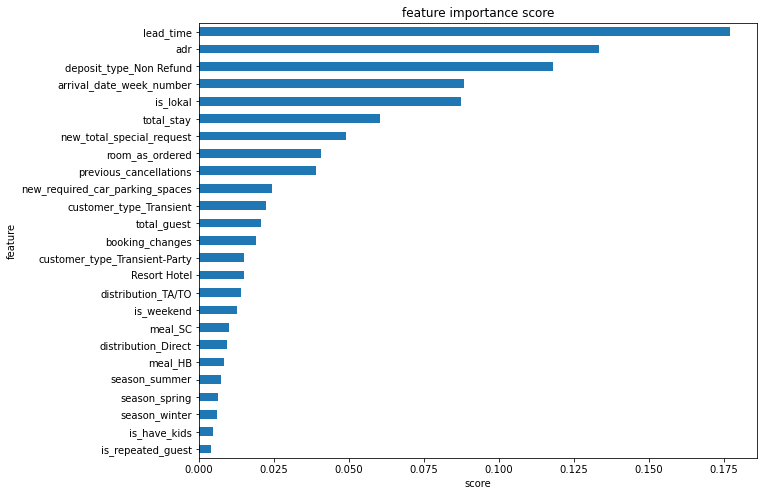

In [253]:
rf1_tuned_feat = pd.Series(rf1_tuned.best_estimator_.feature_importances_, index=X1.columns)
ax = rf1_tuned_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

#### XGBoost

Download XGBoost dulu

pip install xgboost

In [254]:
from xgboost import XGBClassifier

xg1 = XGBClassifier(random_state=42)

In [255]:
xg1.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

Prediction result

In [256]:
xg1_pred = xg1.predict(X1_test)

In [257]:
xg1_pred_proba = xg1.predict_proba(X1_test)

In [258]:
print(classification_report(y1_test, xg1_pred))
print(roc_auc_score(y1_test, xg1_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     21117
           1       0.84      0.76      0.80     12005

    accuracy                           0.86     33122
   macro avg       0.85      0.84      0.85     33122
weighted avg       0.86      0.86      0.86     33122

0.9343564169378448


In [259]:
pd.Series(xg1.feature_importances_, index=X1.columns)

lead_time                          0.006070
arrival_date_week_number           0.003127
is_repeated_guest                  0.008226
previous_cancellations             0.053216
booking_changes                    0.010674
adr                                0.004438
Resort Hotel                       0.006582
is_weekend                         0.002022
season_spring                      0.001710
season_summer                      0.004067
season_winter                      0.008023
total_stay                         0.002822
total_guest                        0.003421
is_have_kids                       0.003178
meal_FB                            0.003204
meal_HB                            0.005019
meal_SC                            0.008971
is_lokal                           0.017944
distribution_Corporate             0.007690
distribution_Direct                0.003462
distribution_TA/TO                 0.013589
room_as_ordered                    0.053735
deposit_type_Non Refund         

Text(0.5, 1.0, 'feature importance score')

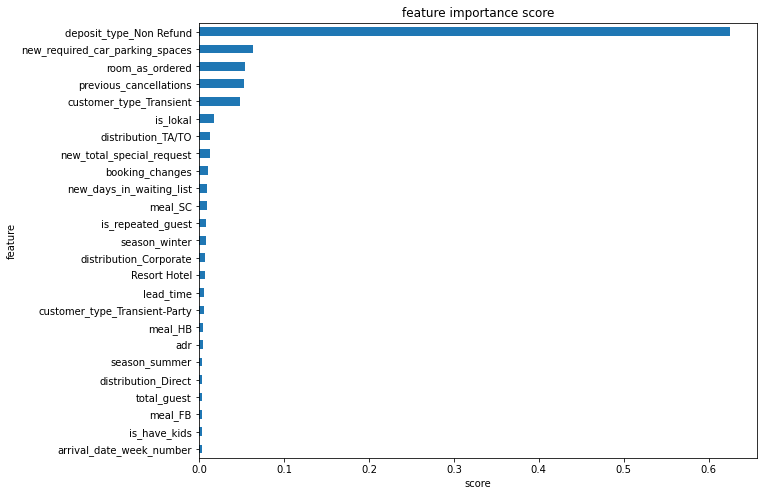

In [260]:
xg1_feat = pd.Series(xg1.feature_importances_, index=X1.columns)
ax = xg1_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Tuning

In [261]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg1_new = XGBClassifier(random_state=42)
xg1_tuned = RandomizedSearchCV(xg1_new, hyperparameters, cv=5, random_state=42, scoring='recall', verbose=1)
xg1_tuned.fit(X1_train,y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.60000

Result after tuning

In [262]:
for key, value in hyperparameters.items() :
        print('Best '+key+':', xg1_tuned.best_estimator_.get_params()[key])

Best max_depth: 60
Best min_child_weight: 6
Best gamma: 0.4
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best eta: 0.3535353535353536
Best lambda: 0.6000000000000001
Best alpha: 0.6000000000000001


In [263]:
# xg1_tuned.best_estimator_

In [264]:
xg1_tuned_pred = xg1_tuned.predict(X1_test)
xg1_tuned_pred_proba = xg1_tuned.predict_proba(X1_test)

In [265]:
print(classification_report(y1_test, xg1_tuned_pred))
print(roc_auc_score(y1_test, xg1_tuned_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     21117
           1       0.84      0.80      0.82     12005

    accuracy                           0.87     33122
   macro avg       0.86      0.85      0.86     33122
weighted avg       0.87      0.87      0.87     33122

0.9419489937628984


Text(0.5, 1.0, 'feature importance score')

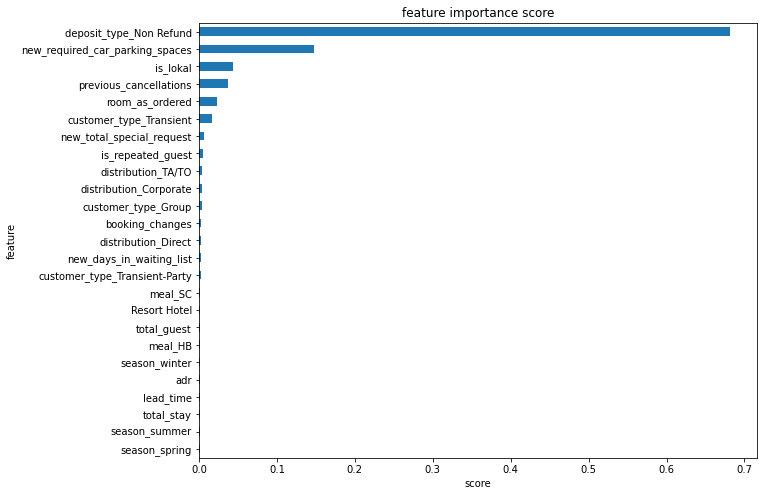

In [266]:
xg1_tuned_feat = pd.Series(xg1_tuned.best_estimator_.feature_importances_, index=X1.columns)
ax = xg1_tuned_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## Data 2

In [267]:
X2 = df_clean1.drop('is_canceled', axis=1)
y2 = df_clean1['is_canceled']

### Split train test

In [268]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 3)

### Modeling

#### Random Forest

In [269]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(random_state=42)

rf2.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

Prediction Result

In [270]:
rf2_pred = rf2.predict(X2_test)
rf2_pred_proba = rf2.predict_proba(X2_test)

In [271]:
print(classification_report(y2_test, rf2_pred))
print(roc_auc_score(y2_test, rf2_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     21117
           1       0.85      0.79      0.82     12005

    accuracy                           0.88     33122
   macro avg       0.87      0.86      0.86     33122
weighted avg       0.87      0.88      0.87     33122

0.9435545247727024


In [272]:
pd.Series(xg1.feature_importances_, index=X2.columns)

lead_time                          0.006070
arrival_date_week_number           0.003127
is_repeated_guest                  0.008226
previous_cancellations             0.053216
booking_changes                    0.010674
adr                                0.004438
Resort Hotel                       0.006582
is_weekend                         0.002022
season_spring                      0.001710
season_summer                      0.004067
season_winter                      0.008023
total_stay                         0.002822
total_guest                        0.003421
is_have_kids                       0.003178
meal_FB                            0.003204
meal_HB                            0.005019
meal_SC                            0.008971
is_lokal                           0.017944
distribution_Corporate             0.007690
distribution_Direct                0.003462
distribution_TA/TO                 0.013589
room_as_ordered                    0.053735
deposit_type_Non Refund         

Text(0.5, 1.0, 'feature importance score')

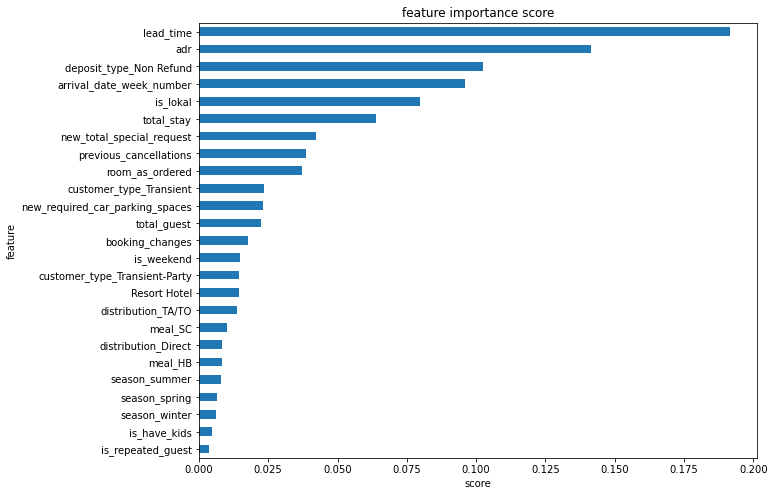

In [273]:
rf2_feat = pd.Series(rf2.feature_importances_, index=X2.columns)
ax2 = rf2_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax2.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Tuning

In [274]:
#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf2_new = RandomForestClassifier(random_state=42)
rf2_tuned = RandomizedSearchCV(rf2_new, hyperparameters, cv=5, random_state=42, scoring='recall')
rf2_tuned.fit(X2_train,y2_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                       

Result after tuning

In [275]:
for key, value in hyperparameters.items() :
        print('Best '+key+':', rf2_tuned.best_estimator_.get_params()[key])

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [276]:
rf2_tuned_pred = rf2_tuned.predict(X2_test)
rf2_tuned_pred_proba = rf2_tuned.predict_proba(X2_test)

print(classification_report(y2_test, rf2_tuned_pred))
print(roc_auc_score(y2_test, rf2_tuned_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     21117
           1       0.86      0.79      0.82     12005

    accuracy                           0.88     33122
   macro avg       0.87      0.86      0.86     33122
weighted avg       0.88      0.88      0.87     33122

0.9449726092210675


Text(0.5, 1.0, 'feature importance score')

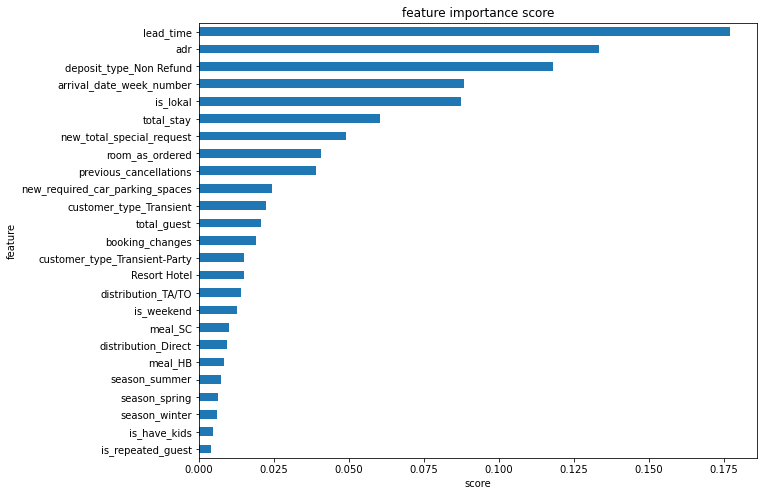

In [277]:
rf2_tuned_feat = pd.Series(rf2_tuned.best_estimator_.feature_importances_, index=X2.columns)
ax2 = rf2_tuned_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax2.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

#### XGBoost

In [278]:
xg2 = XGBClassifier(random_state=42)

In [279]:
xg2.fit(X2_train, y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

Prediction result

In [280]:
xg2_pred = xg2.predict(X2_test)

In [281]:
xg2_pred_proba = xg2.predict_proba(X2_test)

In [282]:
print(classification_report(y2_test, xg2_pred))
print(roc_auc_score(y2_test, xg2_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     21117
           1       0.84      0.76      0.80     12005

    accuracy                           0.86     33122
   macro avg       0.85      0.84      0.85     33122
weighted avg       0.86      0.86      0.86     33122

0.9343494743995577


In [283]:
pd.Series(xg2.feature_importances_, index=X2.columns)

lead_time                          0.006070
arrival_date_week_number           0.003127
is_repeated_guest                  0.008226
previous_cancellations             0.053216
booking_changes                    0.010674
adr                                0.004438
Resort Hotel                       0.006582
is_weekend                         0.002022
season_spring                      0.001710
season_summer                      0.004067
season_winter                      0.008023
total_stay                         0.002822
total_guest                        0.003421
is_have_kids                       0.003178
meal_FB                            0.003204
meal_HB                            0.005019
meal_SC                            0.008971
is_lokal                           0.017944
distribution_Corporate             0.007690
distribution_Direct                0.003462
distribution_TA/TO                 0.013589
room_as_ordered                    0.053735
deposit_type_Non Refund         

Text(0.5, 1.0, 'feature importance score')

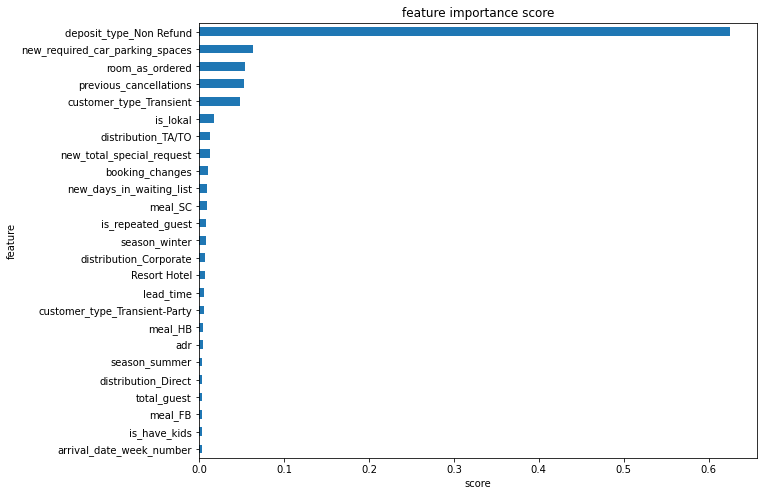

In [313]:
xg2_feat = pd.Series(xg2.feature_importances_, index=X2.columns)
ax2 = xg2_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax2.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Tuning

In [285]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg2_new = XGBClassifier(random_state=42)
xg2_tuned = RandomizedSearchCV(xg2_new, hyperparameters, cv=5, random_state=42, scoring='recall', verbose=1)
xg2_tuned.fit(X2_train,y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.60000

Result after tuning

In [286]:
for key, value in hyperparameters.items() :
        print('Best '+key+':', xg2_tuned.best_estimator_.get_params()[key])

Best max_depth: 60
Best min_child_weight: 6
Best gamma: 0.4
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best eta: 0.3535353535353536
Best lambda: 0.6000000000000001
Best alpha: 0.6000000000000001


In [287]:
xg2_tuned_pred = xg2_tuned.predict(X2_test)
xg2_tuned_pred_proba = xg2_tuned.predict_proba(X2_test)

In [288]:
print(classification_report(y2_test, xg2_tuned_pred))
print(roc_auc_score(y2_test, xg2_tuned_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     21117
           1       0.84      0.80      0.82     12005

    accuracy                           0.87     33122
   macro avg       0.86      0.85      0.86     33122
weighted avg       0.87      0.87      0.87     33122

0.9419462404153279


Text(0.5, 1.0, 'feature importance score')

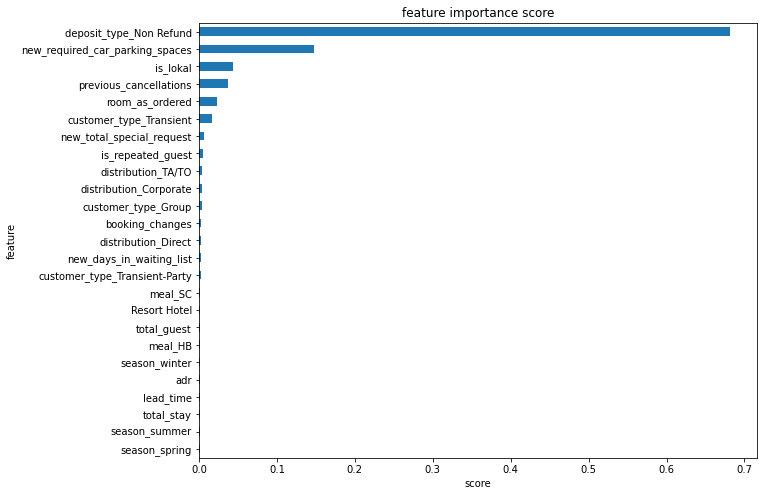

In [311]:
xg2_tuned_feat = pd.Series(xg2_tuned.best_estimator_.feature_importances_, index=X2.columns)
ax2 = xg2_tuned_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax2.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## Data 3

In [290]:
X3 = df_clean2.drop('is_canceled', axis=1)
y3 = df_clean2['is_canceled']

### Split train test

In [291]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 3)

### Modeling

### Random Forest

In [292]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118987 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   is_canceled                      118987 non-null  int64
 1   arrival_date_week_number         118987 non-null  int64
 2   is_repeated_guest                118987 non-null  int64
 3   previous_cancellations           118987 non-null  int64
 4   booking_changes                  118987 non-null  int64
 5   Resort Hotel                     118987 non-null  uint8
 6   is_weekend                       118987 non-null  int64
 7   season_spring                    118987 non-null  uint8
 8   season_summer                    118987 non-null  uint8
 9   season_winter                    118987 non-null  uint8
 10  total_stay                       118987 non-null  int64
 11  total_guest                      118987 non-null  int64
 12  is_have_kids                  

In [293]:
from sklearn.ensemble import RandomForestClassifier

rf3 = RandomForestClassifier(random_state=42)

rf3.fit(X3_train, y3_train)

RandomForestClassifier(random_state=42)

Prediction Result

In [294]:
rf3_pred = rf3.predict(X3_test)
rf3_pred_proba = rf3.predict_proba(X3_test)

In [296]:
print(classification_report(y3_test, rf3_pred))
print(roc_auc_score(y3_test, rf3_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     22404
           1       0.83      0.77      0.80     13293

    accuracy                           0.86     35697
   macro avg       0.85      0.84      0.84     35697
weighted avg       0.85      0.86      0.85     35697

0.9262881172294988


In [298]:
pd.Series(xg1.feature_importances_, index=X3.columns)

arrival_date_week_number           0.006070
is_repeated_guest                  0.003127
previous_cancellations             0.008226
booking_changes                    0.053216
Resort Hotel                       0.010674
is_weekend                         0.004438
season_spring                      0.006582
season_summer                      0.002022
season_winter                      0.001710
total_stay                         0.004067
total_guest                        0.008023
is_have_kids                       0.002822
meal_FB                            0.003421
meal_HB                            0.003178
meal_SC                            0.003204
is_lokal                           0.005019
distribution_Corporate             0.008971
distribution_Direct                0.017944
distribution_TA/TO                 0.007690
room_as_ordered                    0.003462
deposit_type_Non Refund            0.013589
deposit_type_Refundable            0.053735
customer_type_Group             

Text(0.5, 1.0, 'feature importance score')

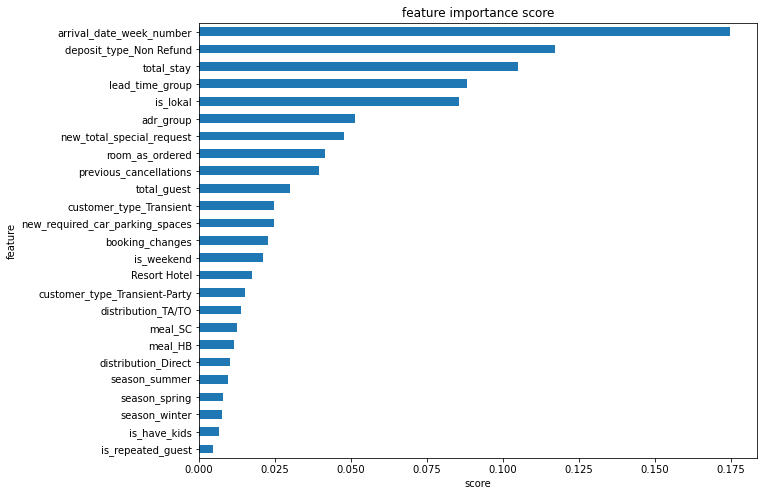

In [299]:
rf3_feat = pd.Series(rf3.feature_importances_, index=X3.columns)
ax3 = rf3_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax3.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Tuning

In [300]:
#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf3_new = RandomForestClassifier(random_state=42)
rf3_tuned = RandomizedSearchCV(rf2_new, hyperparameters, cv=5, random_state=42, scoring='recall')
rf3_tuned.fit(X3_train,y3_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                       

Result after tuning

In [301]:
for key, value in hyperparameters.items() :
        print('Best '+key+':', rf3_tuned.best_estimator_.get_params()[key])

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [302]:
rf3_tuned_pred = rf3_tuned.predict(X3_test)
rf3_tuned_pred_proba = rf3_tuned.predict_proba(X3_test)

print(classification_report(y3_test, rf3_tuned_pred))
print(roc_auc_score(y3_test, rf3_tuned_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     22404
           1       0.84      0.77      0.80     13293

    accuracy                           0.86     35697
   macro avg       0.86      0.84      0.85     35697
weighted avg       0.86      0.86      0.86     35697

0.9307872990273348


Text(0.5, 1.0, 'feature importance score')

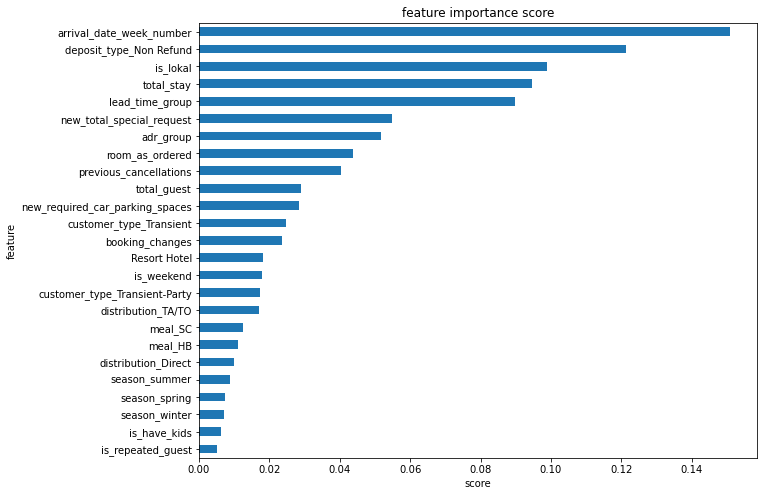

In [303]:
rf3_tuned_feat = pd.Series(rf3_tuned.best_estimator_.feature_importances_, index=X3.columns)
ax3 = rf3_tuned_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax3.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### XGBoost

In [319]:
xg3 = XGBClassifier(random_state=42)

In [320]:
xg3.fit(X3_train, y3_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

Prediction Result

In [321]:
xg3_pred = xg3.predict(X3_test)

In [322]:
xg3_pred_proba = xg3.predict_proba(X3_test)

In [308]:
print(classification_report(y3_test, xg3_pred))
print(roc_auc_score(y3_test, xg3_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     22404
           1       0.85      0.74      0.79     13293

    accuracy                           0.85     35697
   macro avg       0.85      0.83      0.84     35697
weighted avg       0.85      0.85      0.85     35697

0.9288100151861363


In [323]:
pd.Series(xg3.feature_importances_, index=X3.columns)

arrival_date_week_number           0.003025
is_repeated_guest                  0.009725
previous_cancellations             0.040351
booking_changes                    0.007493
Resort Hotel                       0.005045
is_weekend                         0.002597
season_spring                      0.001698
season_summer                      0.004107
season_winter                      0.009089
total_stay                         0.003235
total_guest                        0.003279
is_have_kids                       0.002164
meal_FB                            0.002235
meal_HB                            0.003919
meal_SC                            0.007931
is_lokal                           0.019492
distribution_Corporate             0.005493
distribution_Direct                0.003322
distribution_TA/TO                 0.011349
room_as_ordered                    0.042619
deposit_type_Non Refund            0.650815
deposit_type_Refundable            0.001624
customer_type_Group             

Text(0.5, 1.0, 'feature importance score')

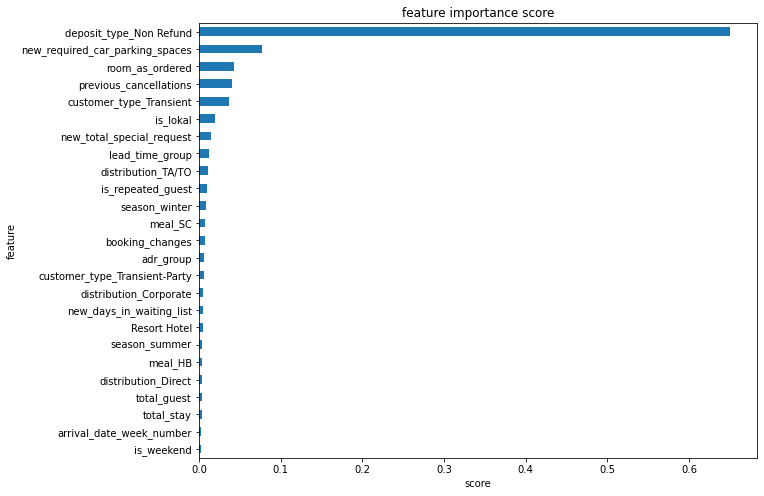

In [324]:
xg3_feat = pd.Series(xg3.feature_importances_, index=X3.columns)
ax3 = xg3_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax3.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Tuning

In [325]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg3_new = XGBClassifier(random_state=42)
xg3_tuned = RandomizedSearchCV(xg3_new, hyperparameters, cv=5, random_state=42, scoring='recall', verbose=1)
xg3_tuned.fit(X3_train,y3_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.60000

Result after tuning

In [326]:
for key, value in hyperparameters.items() :
        print('Best '+key+':', xg3_tuned.best_estimator_.get_params()[key])

Best max_depth: 60
Best min_child_weight: 6
Best gamma: 0.4
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best eta: 0.3535353535353536
Best lambda: 0.6000000000000001
Best alpha: 0.6000000000000001


In [327]:
xg3_tuned_pred = xg3_tuned.predict(X3_test)
xg3_tuned_pred_proba = xg3_tuned.predict_proba(X3_test)

In [328]:
print(classification_report(y3_test, xg3_tuned_pred))
print(roc_auc_score(y3_test, xg3_tuned_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     22404
           1       0.83      0.77      0.80     13293

    accuracy                           0.86     35697
   macro avg       0.85      0.84      0.84     35697
weighted avg       0.86      0.86      0.86     35697

0.933085490343694


Text(0.5, 1.0, 'feature importance score')

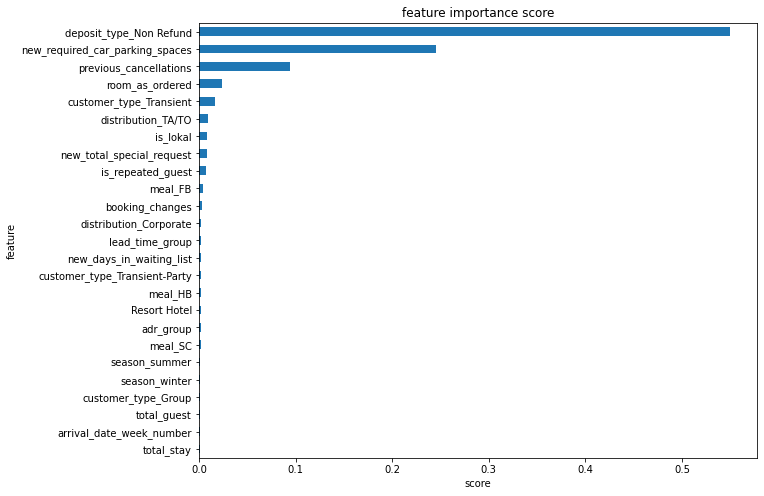

In [329]:
xg3_tuned_feat = pd.Series(xg3_tuned.best_estimator_.feature_importances_, index=X3.columns)
ax3 = xg3_tuned_feat.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax3.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')